Load CT calibration curve and interpolate to required density values

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

In [5]:
CT_data = np.genfromtxt('CT to electron density.txt', skip_header=1)

In [11]:
CT_vals = CT_data[:,0]   # ct values
ed_vals = CT_data[:,1]  # electron density vals

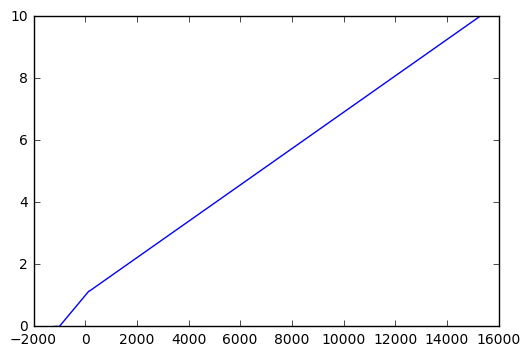

In [22]:
plt.plot(CT_vals, ed_vals)  # calibration data

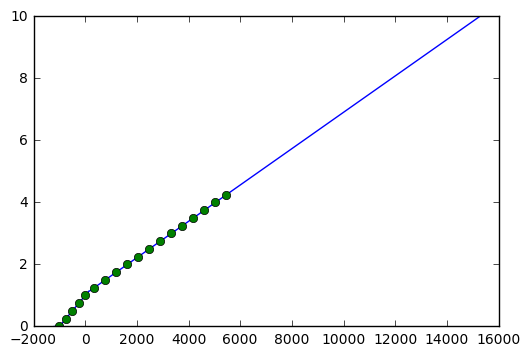

In [23]:
f = interpolate.interp1d(ed_vals, CT_vals)   # returns an interpolate function

ed_new = np.arange(0, 4.5, 0.25)
CT_new = f(ed_new)   # use interpolation function returned by `interp1d`

plt.plot(CT_vals, ed_vals, '-', CT_new, ed_new, 'o');

In [26]:
CT_data_new = np.vstack((CT_new, ed_new)).T
CT_data_new

array([[ -1.00000000e+03,   0.00000000e+00],
       [ -7.50000000e+02,   2.50000000e-01],
       [ -5.00000000e+02,   5.00000000e-01],
       [ -2.50000000e+02,   7.50000000e-01],
       [  0.00000000e+00,   1.00000000e+00],
       [  3.49152542e+02,   1.25000000e+00],
       [  7.75510204e+02,   1.50000000e+00],
       [  1.20170455e+03,   1.75000000e+00],
       [  1.62793783e+03,   2.00000000e+00],
       [  2.05439727e+03,   2.25000000e+00],
       [  2.48085671e+03,   2.50000000e+00],
       [  2.90731615e+03,   2.75000000e+00],
       [  3.33377559e+03,   3.00000000e+00],
       [  3.76023503e+03,   3.25000000e+00],
       [  4.18669447e+03,   3.50000000e+00],
       [  4.61315390e+03,   3.75000000e+00],
       [  5.03961334e+03,   4.00000000e+00],
       [  5.46607278e+03,   4.25000000e+00]])

In [28]:
np.savetxt('CT_converted.csv', CT_data_new, delimiter=',')